In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../../data processing/preprocessed.csv')

In [3]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12


In [4]:
X = df.drop('RainTomorrow', axis=1)

In [5]:
y = df['RainTomorrow']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
model = DecisionTreeClassifier()


In [10]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    importance = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    print(importance)
    print('\n')
    sns.barplot(x = 'Feature Importance', y = importance.index, data=importance)

In [16]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix


              precision    recall  f1-score   support

       False       0.87      0.85      0.86     34058
        True       0.50      0.54      0.52      9580

    accuracy                           0.78     43638
   macro avg       0.68      0.69      0.69     43638
weighted avg       0.79      0.78      0.78     43638



               Feature Importance
Humidity3pm              0.263349
WindGustSpeed            0.065999
Pressure3pm              0.063681
Sunshine                 0.049793
Humidity9am              0.041999
Pressure9am              0.041871
MinTemp                  0.040890
Location                 0.040673
Evaporation              0.039624
Temp9am                  0.038801
Temp3pm                  0.035664
MaxTemp                  0.035119
WindSpeed9am             0.031521
WindSpeed3pm             0.031442
Rainfall                 0.028005
WindDir3pm               0.027996
WindGustDir              0.027638
WindDir9am               0.025829
Cloud3pm                 

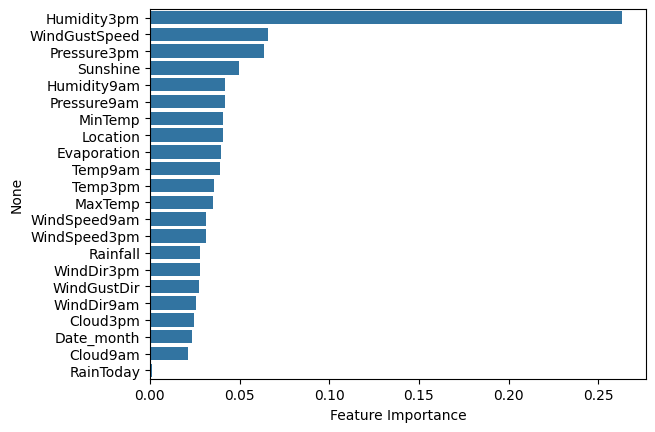

In [17]:
report_model(model)